<a href="https://colab.research.google.com/github/devzohaib/Simple-Linear-Regression/blob/master/Case_study_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

https://www.kaggle.com/code/devzohaib/simple-linear-regression

In this example we will consider sales based on 'TV' marketing budget.

In this notebook, we'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.


## Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
cd /content/drive/MyDrive/Machine learning 2024/Notebooks/Linear regression

/content/drive/MyDrive/Machine learning 2024/Notebooks/Linear regression


In [1]:
import pandas as pd

In [2]:
# Reading csv file from github repo
advertising = pd.read_csv('tvmarketing.csv')

Now, let's check the structure of the advertising dataset.

In [15]:
# Display the first 5 rows
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [16]:
# Display the last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [17]:
# Let's check the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [18]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 2)

In [19]:
# Let's look at some statistical information about the dataframe.
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Visualising Data Using Plot

<Axes: xlabel='TV', ylabel='Sales'>

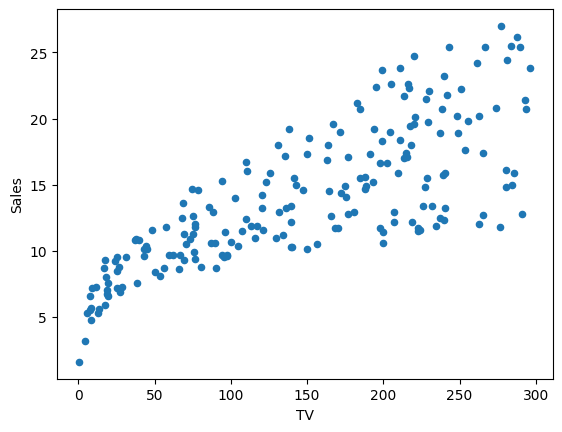

In [20]:
# Visualise the relationship between the features and the response using scatterplots
advertising.plot(x='TV',y='Sales',kind='scatter')

# Perfroming Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in Model Building using ```sklearn```

Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows:

## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [3]:
# Putting feature variable to X
X = advertising['TV']

# Print the first 5 rows
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [4]:
# Putting response variable to y
y = advertising['Sales']

# Print the first 5 rows
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

Feature scaling techniques

## Splitting Data into Training and Testing Sets

In [5]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state=2)


#kfold cross validation cv=5

KFold

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160,)
(160,)
(40,)
(40,)


In [6]:
#It is a general convention in scikit-learn that observations are rows, while features are columns.
#This is needed only when you are using a single feature; in this case, 'TV'.

import numpy as np
#Simply put, numpy.newaxis is used to increase the dimension of the existing array by one more dimension,
X_train= np.array(X_train)
X_test = np.array(X_test)

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 1)
(160,)
(40, 1)
(40,)


## Performing Linear Regression

In [7]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

## Coefficients Calculation

In [8]:
# Print the intercept and coefficients
print(lr.intercept_)    #seta 0
print(lr.coef_)     #seta 1

6.566524608650465
[0.05245828]


$y = 7.29 + 0.0460 \times TV $<br>

Now, let's use this equation to predict our sales.

## Predictions

In [ ]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

#### Computing RMSE and R^2 Values
RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model


In [ ]:
y_test.shape # cheek the shape to generate the index for plot

(40,)

Text(0, 0.5, 'Sales')

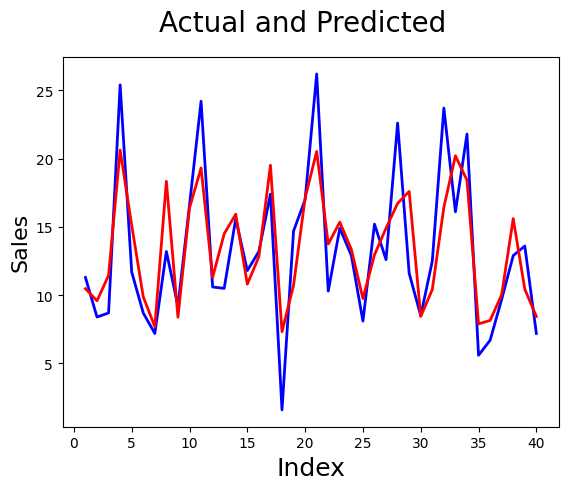

In [ ]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,41,1)]         # generating index
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

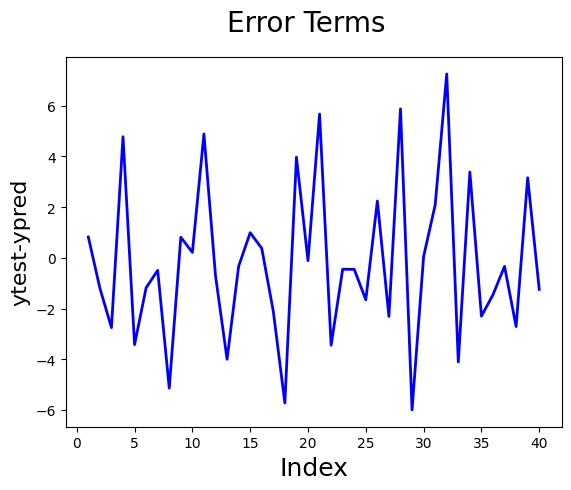

In [ ]:
# Error terms
c = [i for i in range(1,41,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

RMSE, MAE

In [ ]:
r_squared = r2_score(y_test, y_pred)

In [ ]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 10.18618193453022
r_square_value : 0.6763151577939721


In [ ]:
# this mse =10.18 means that this model is not able to match the 10.18 percent of the values
# r2 means that your model is 67% is accurate on test data .

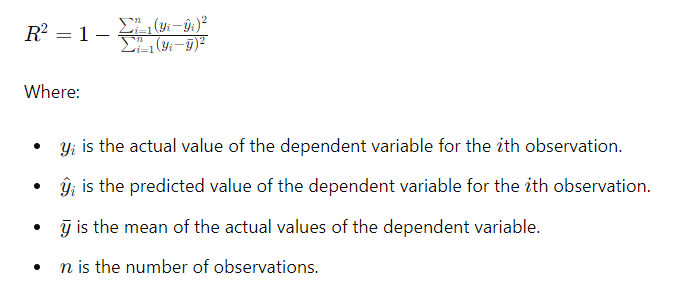

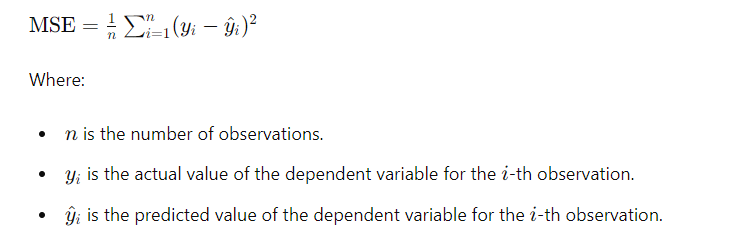

## K-Fold

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

advertising = pd.read_csv('tvmarketing.csv')
X = np.array(advertising['TV'])
y = np.array(advertising['Sales'])
X = X[:, np.newaxis]
y = y[:, np.newaxis]
avg_mse_list = []
for i in range(1,1000):
    kf = KFold(n_splits=2, shuffle=True, random_state=i)
    model = LinearRegression()

    mse_list = []

    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)

    # Calculate the average mean squared error
    average_mse = np.mean(mse_list)
    avg_mse_list.append(average_mse)
    #print(f'Average Mean Squared Error: {average_mse}')

best_random_state = np.argmin(avg_mse_list) + 1
best_mse = min(avg_mse_list)


551 10.51268873413024


In [46]:
from sklearn.metrics import mean_squared_error, r2_score
r_squared = r2_score(y_test, y_pred)
r_squared

0.5296816439798862

In [27]:
print(avg_mse_list[41])

10.516608520805864


In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.95 , random_state=41)

tree_model = DecisionTreeRegressor(random_state=1)
tree_model.fit(X_train, y_train)
y_tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, y_tree_pred)
print(f'Decision Tree Mean Squared Error: {tree_mse}')


Decision Tree Mean Squared Error: 28.258


In [40]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.95 , random_state=41)

dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(X_train, y_train)
y_dummy_pred = dummy_model.predict(X_test)
dummy_mse = mean_squared_error(y_test, y_dummy_pred)
print(f'Baseline Mean Squared Error: {dummy_mse}')


Baseline Mean Squared Error: 17.595036288088647
